## *Ride Price Prediction using Machine Learning*

This project predicts ride prices using Machine Learning based on features such as distance, duration, traffic, weather, and demand level.
Linear Regression is used to estimate the ride cost, while Logistic Regression classifies rides as high-cost or low-cost.
The workflow includes data preprocessing, encoding, scaling, model training, and performance evaluation.

## Dataset Justification

This project predicts ride prices using several features. Below is a clear explanation of why each feature was chosen and how it might influence the ride price.

### Features and their influence

- **distance_km**: Represents the length of the ride in kilometers. Longer rides typically cost more, so this feature is directly proportional to the price.  
- **duration_min**: Represents the duration of the ride in minutes. Longer rides increase fare due to time spent traveling and may be influenced by traffic conditions.  
- **time_of_day**: Indicates when the ride occurs (morning, afternoon, evening, night). Peak hours may have higher demand and traffic, potentially increasing the price.  
- **traffic_level**: Categorical feature indicating traffic conditions (low, medium, high). Higher traffic can slow rides, increasing duration and fare.  
- **weather**: Weather condition during the ride (clear, rainy). Rainy conditions can lead to slower rides and higher demand, which may increase ride price.  
- **demand_level**: Indicates overall ride demand (low, medium, high). High-demand periods often result in surge pricing, increasing the ride cost.  
- **ride_type**: Type of ride (standard, premium). Premium rides are more expensive than standard rides.

### Feature considered but excluded

- **passenger_count**: Initially considered, but most rides in the dataset have a single passenger. This lack of variation means it would not provide meaningful predictive value, so it was excluded from the model.

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltS

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

### Set random seed and number of rides

In [3]:
np.random.seed(42)
n = 200


### Create features one by one

In [4]:
data = {
    "distance_km": np.random.uniform(1, 30, n),
    "duration_min": np.random.uniform(5, 90, n),
    "time_of_day": np.random.choice(
        ["morning", "afternoon", "evening", "night"], n
    ),
    "traffic_level": np.random.choice(
        ["low", "medium", "high"], n
    ),
    "weather": np.random.choice(
        ["clear", "rainy"], n
    ),
    "demand_level": np.random.choice(
        ["low", "medium", "high"], n
    ),
    "ride_type": np.random.choice(
        ["standard", "premium"], n
    )
}


### Create the DataFrame

In [21]:
df = pd.DataFrame(data)
df.head()



,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,ride_type
0,11.861663,59.572690,morning,medium,clear,high,standard
1,28.570715,12.151897,afternoon,high,rainy,low,standard
2,22.227824,18.738441,morning,low,rainy,medium,premium
3,18.361096,81.377106,morning,low,rainy,low,standard
4,5.524541,56.546470,afternoon,low,rainy,high,premium


### Create the price (target)

In [8]:
df["ride_price"] = (
    2 +
    df["distance_km"] * 0.8 +
    df["duration_min"] * 0.2 +
    df["traffic_level"].map({"low": 0, "medium": 2, "high": 5}) +
    df["weather"].map({"clear": 0, "rainy": 3}) +
    df["demand_level"].map({"low": 0, "medium": 2, "high": 6}) +
    df["ride_type"].map({"standard": 0, "premium": 5})
)


In [9]:
df.head()



,distance_km,duration_min,time_of_day,traffic_level,weather,demand_level,ride_type,ride_price
0,11.861663,59.572690,morning,medium,clear,high,standard,31.403869
1,28.570715,12.151897,afternoon,high,rainy,low,standard,35.286951
2,22.227824,18.738441,morning,low,rainy,medium,premium,33.529948
3,18.361096,81.377106,morning,low,rainy,low,standard,35.964298
4,5.524541,56.546470,afternoon,low,rainy,high,premium,31.728926


### Check for missing values

In [12]:
print(df.isnull().sum())



distance_km      0
duration_min     0
time_of_day      0
traffic_level    0
weather          0
demand_level     0
ride_type        0
ride_price       0
dtype: int64


### Simple visualization

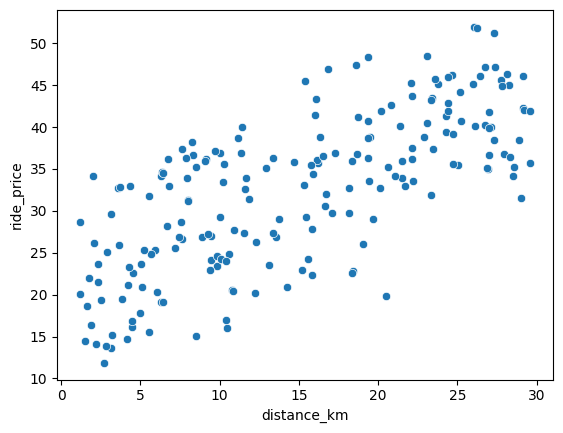

In [13]:
sns.scatterplot(x="distance_km", y="ride_price", data=df)
plt.show()



### Encoding categorical data

In [16]:
df_encoded = pd.get_dummies(df, drop_first=True)



### Regression task

In [17]:
X = df_encoded.drop("ride_price", axis=1)
y = df_encoded["ride_price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 6.394884621840902e-15


### Classification task

In [18]:
df_encoded["high_cost"] = (
    df_encoded["ride_price"] > df_encoded["ride_price"].median()
).astype(int)

X_cls = df_encoded.drop(["ride_price", "high_cost"], axis=1)
y_cls = df_encoded["high_cost"]

X_cls_scaled = scaler.fit_transform(X_cls)

X_train, X_test, y_train, y_test = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


Accuracy: 0.95
[[17  2]
 [ 0 21]]
